# **Transcript Analysis**

This notebook presents key visualizations derived from cleaned transcript data. The goal is to understand trends in GPA, compare performance to class averages, explore course difficulty patterns, and evalutate my overall performance over time.

In [295]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))

from src.ingest import ingest
from src.clean import clean, drop_non_GPA_courses
from src.analyze import get_cum_gpa
import src.visualize as vs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [296]:
path = Path(project_root) / "data" / "Transcript.csv"

df_raw = ingest(path)
df = clean(df_raw)
df_filtered = drop_non_GPA_courses(df)

***
## GPA Over Time

These plots compares my term and yearly GPA to the average GPA of my enrolled classes, highlighting long-term trends and relative performance.


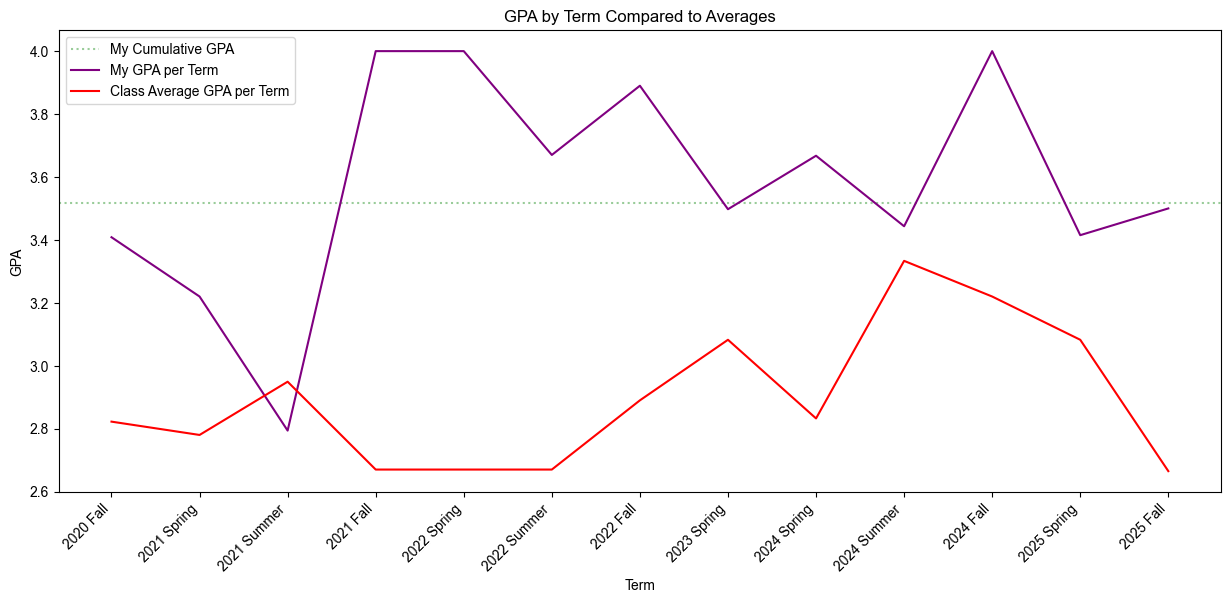

In [297]:
vs.plot_GPA_by_term(df_filtered)

This plot shows a consistent GPA above the class average across most terms. Periods of increased volatility coincide with higher course difficulty, larger credit loads, or a larger increase in courses taken in weaker departments/departments outside my major.

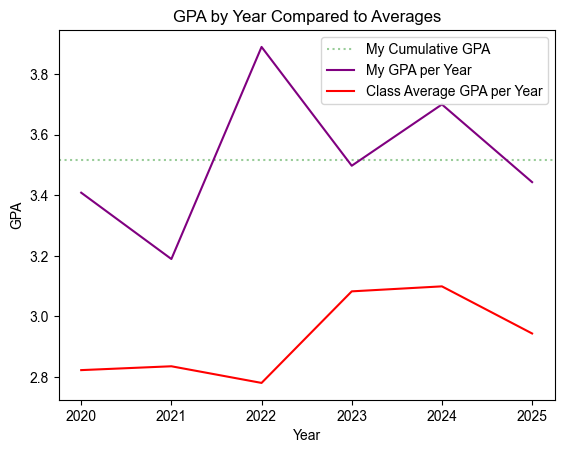

In [298]:
vs.plot_GPA_by_year(df_filtered)

This plot shows a consistent GPA above the class average over all academic years. After 2021 is when I switched majors from engineering to computer science, which I was more interested in.

***
## GPA by Department

This plot compares my weighted average GPA for courses in certain departments and compare it to the class averages of my enrolled courses in those departments, identifying areas of success and struggles.

Department Acronyms:
- CA - Contemporary Arts
- CHEM - Chemistry
- CMPT - Computing Science
- ENSC - Engineering Science
- GSWS - Gender, Sexuality, and Women's Studies
- IAT - Interactive Arts and Technology
- INDG - Indigenous Studies
- MACM - Mathematics and Computeing Science
- MATH - Mathematics
- PHYS - Physics
- POL - Political Science
- PYSC - Pyschology
- STAT - Statistics


Notes:
- Department codes are sourced directly from the official transcript

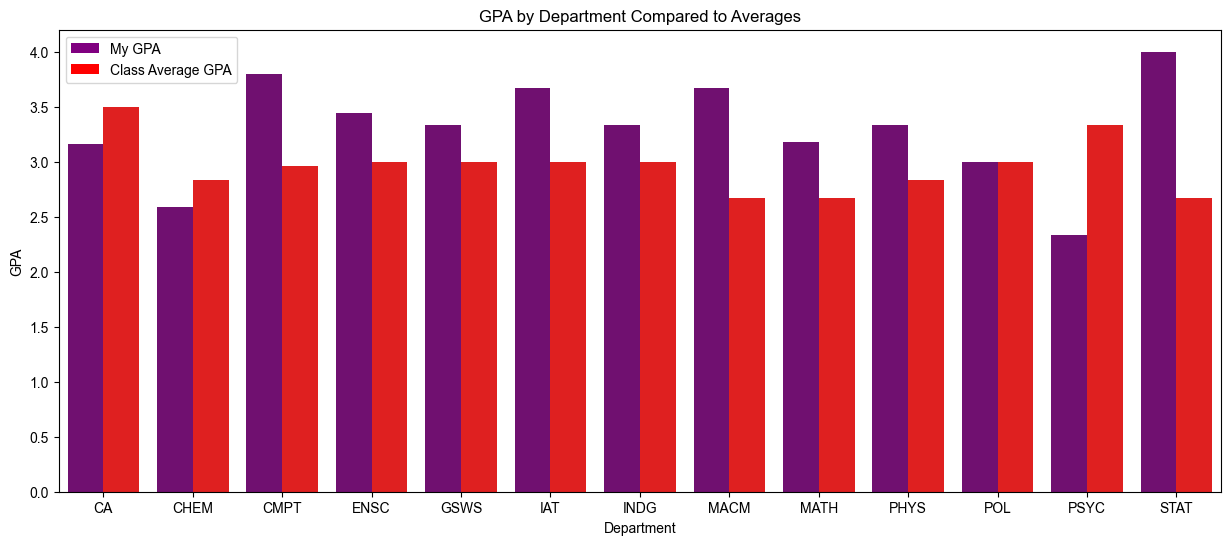

In [299]:
vs.plot_GPA_by_dept(df_filtered)

This plot shows a fairly conisistant above average performance the majority of departments, particularly in CMPT, MACM, MATH, STAT, and ENSC, suggesting consistent performance above averagers in technical and quantitatively focused courses. In contrast, performance is closer to or below the class average in CHEM and PSYC, with PSYC showing the largest negative deviation. This may reflect differences in course structure, assessment style, or relative alignment with my academic strengths and areas of interest.

***
## GPA by Course Level

This plot compares my weighted average GPA to class averages based on course level. Typically, course level corresponds to what year a student is expected to take this course in. Although many of my electives were at the 100 level due to being outside of my major, and some 300 and 400 level courses were taken before my third and fourth year respectively.

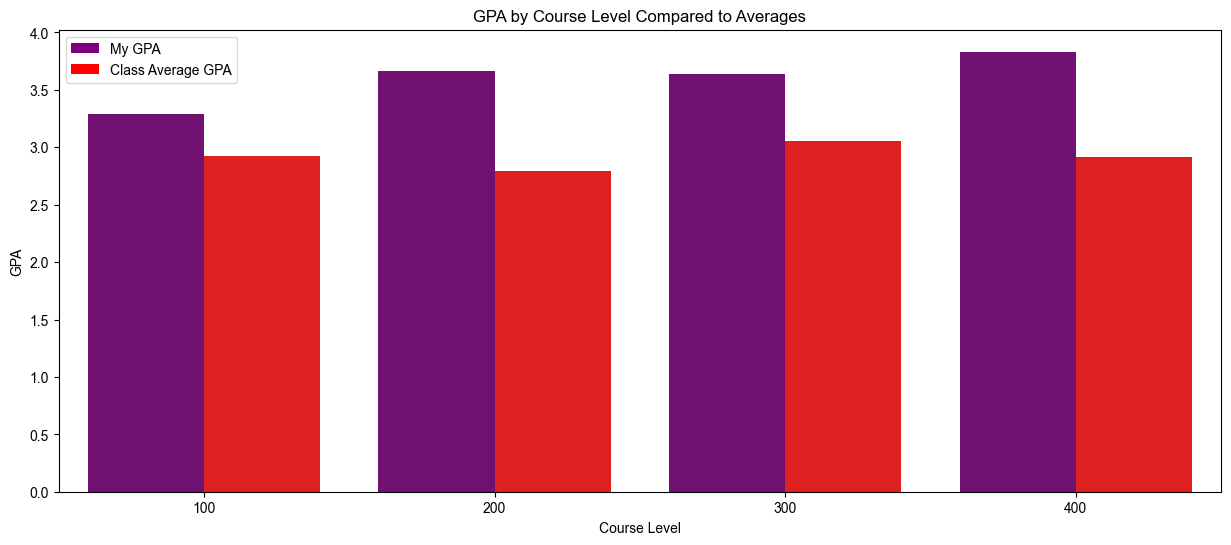

In [300]:
vs.plot_GPA_by_course_level(df_filtered)

This plot shows that I on average outperformed the average at all levels. However, it is interesting to note that I performed most well in 400 level courses which tend to be more challenging than lower level courses. One possible explaination for this is that all my 400 level courese were within the Computing Science department and were all on topics I found interesting (Machine Learning, Databases, Cryptography, etc.).

***
## GPA by Credit Load

This plot examines my weighted average GPA based on my total credit load in the semester. For reference, a typical course is assigned a value of three credits. Addititonal labs or tutorials may warrant an additional credit in some cases if the workload is higher. 

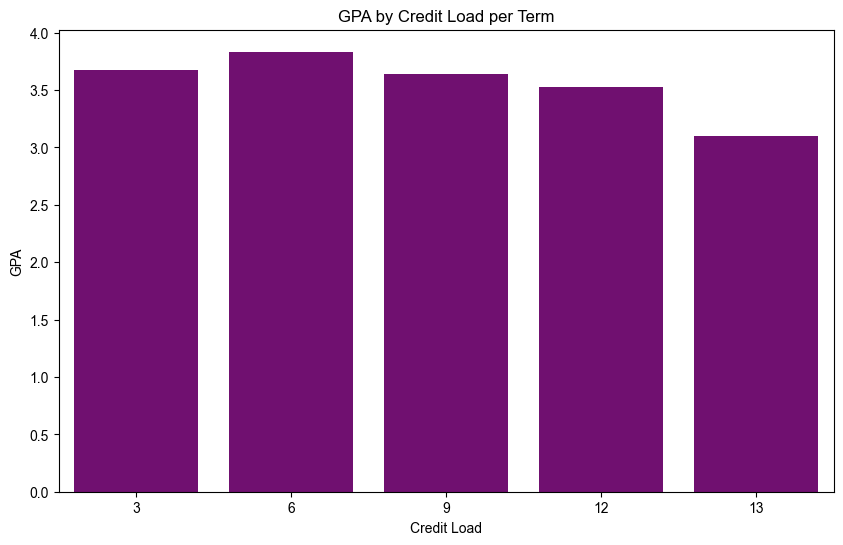

In [302]:
vs.plot_GPA_by_credit_load(df_filtered)

This graph shows that I tend to perform slightly better when taking a lower course load, but my GPA does not drastically change between taking one, two, three, or four courses in a semester. A possible explaination for the drop in my GPA for the thirteen credit semesters is that I only had two of them, both in my first year, both before I switched majors, and one of them was my worst academic semester at SFU (Summer 2021).

*** 
## Course Analysis by Difficulty Index

This plot displays my ten easiest and hardest courses based on a calculated z-score of my performance in the class compared to my final GPA. A higher positive value indicates an easier course and a lower negative score indicates a harder course. 

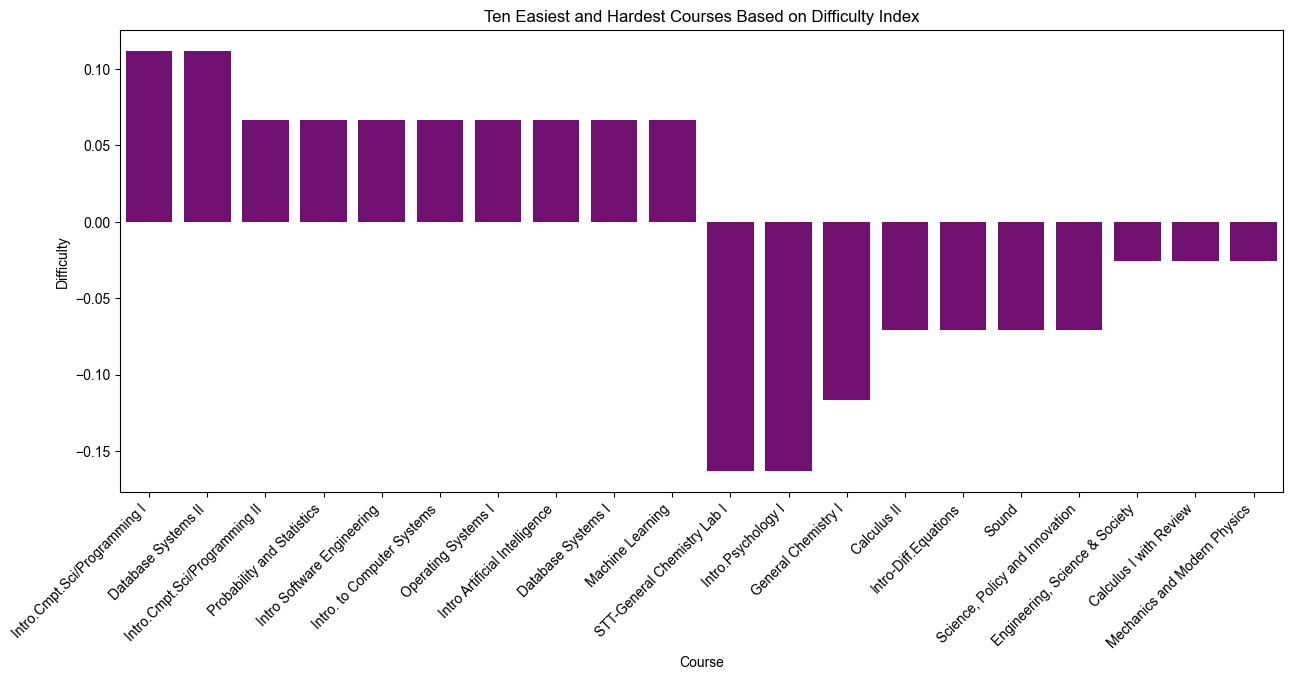

In [301]:
vs.plot_hardest_and_easiest_courses(df_filtered)

This plot shows that all ten of my easiest courses were Computing Science courses, which is to be expected based on the previous plots. However, it is interesing to note which courese are on my ten hardest courses. Three of the ten are MATH courses, which is interesting because my performance was above average compared to class averages, but below average compared to my final cumulative GPA. Four of my ten worst courses were taken in a single semester, Summer 2021. 